In [9]:
import requests
import pandas as pd
import numpy as np
import math

import pprint

import matplotlib.pyplot as plt
# import seaborn as sns
import graphing


import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


from datetime import datetime
from time import time

import statsmodels.formula.api as smf
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans



from sklearn.metrics import confusion_matrix, classification_report, log_loss, mean_squared_error, mean_absolute_error, r2_score, make_scorer, balanced_accuracy_score, accuracy_score

In [2]:
def download_file(url, filename):

    # Send a GET request to the URL
    response = requests.get(url)
    
    # Check if the request was successful
    response.raise_for_status()  # This will raise an exception for HTTP errors
    
    # Write the content to a file
    with open(filename, 'wb') as f:
        f.write(response.content)

url_1 = r"https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv"

download_file(url_1, 'seeds.csv')

In [3]:
data = pd.read_csv('seeds.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
202,11.18,12.72,0.8680,5.009,2.810,4.051
61,11.23,12.63,0.8840,4.902,2.879,2.269
184,12.89,13.77,0.8541,5.495,3.026,6.185
119,20.03,16.90,0.8811,6.493,3.857,3.063
98,18.17,16.26,0.8637,6.271,3.512,2.853
209,12.30,13.34,0.8684,5.243,2.974,5.637
103,19.18,16.63,0.8717,6.369,3.681,3.357
46,15.36,14.76,0.8861,5.701,3.393,1.367
141,13.32,13.94,0.8613,5.541,3.073,7.035
173,11.40,13.08,0.8375,5.136,2.763,5.588


In [4]:
# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

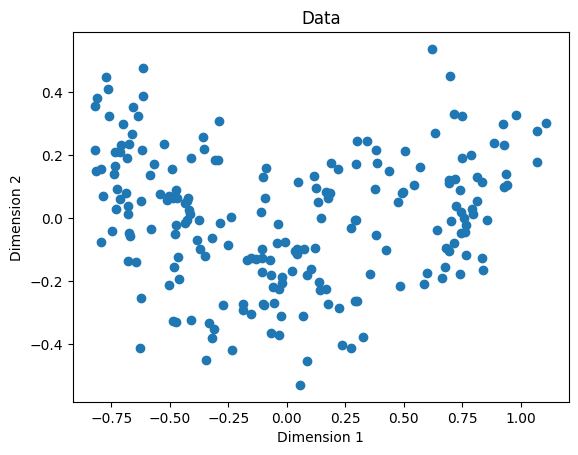

In [5]:

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

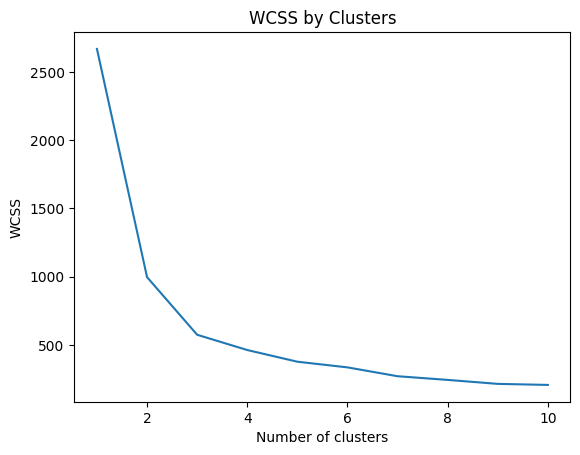

In [6]:
# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()